In [10]:
pip install mysql.connector

In [9]:
pip install atoti

     |████████████████████████████████| 141.9 MB 54 kB/s 
     |████████████████████████████████| 36.8 MB 1.7 MB/s 
     |████████████████████████████████| 198 kB 34.9 MB/s 
     |████████████████████████████████| 44 kB 2.1 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.


In [11]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import atoti as tt 
import mysql.connector 
from mysql.connector import Error

/usr/local/lib/python3.7/dist-packages/atoti/_compatibility.py:17: FutureWarning: atoti's support for Python < 3.8 is deprecated and will be removed in the next release.
  "atoti's support for Python < 3.8 is deprecated and will be removed in the next release."


Welcome to atoti 0.6.4!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, set the ATOTI_DISABLE_TELEMETRY environment variable to True.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


In [12]:
def create_db_connection():
    connection = None
    try:
        connection = mysql.connector.connect(
            host="bac.c5spguzjvsqr.ap-southeast-1.rds.amazonaws.com",
            user="admin",
            passwd= "^IW[qN8cs]znCPK2XE",
            database="bac"
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [13]:
cn = create_db_connection()

MySQL Database connection successful


In [14]:
# for when you need to apply changes to db (create/alter/insert, update, delete)
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

In [15]:
# for when you require a result from your query (read operations)
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return pd.DataFrame(result, columns= list(cursor.column_names))
    except Error as err:
        print(f"Error: '{err}'")

### Import datasets

In [16]:
query = """
SELECT * FROM Transaction_Data_csv 
"""

transaction = read_query(cn, query)
transaction.head()

,Column1,employee_number,vendor_name,custom_merchant_category,creditor_merchant_category,comment,expense_date,status,tax_code,expense_amount,net_amount,tax_amount,authorised_by,transaction_id,count,total_expense
0,1,0037057,LUNA PARK SYDNEY PTY,Alert,QUICKPAYMENT SERVICE-FAST FOOD,Senior Leader Session AV - RMS,2021-08-07,SENT_TO_GL,P1,4195.25,3813.86,381.39,77779848,28196,1,4195.25000
1,2,0036544,OFFICEWORKS 0250,Stationery,"STATIONERY, OFFICE AND SCHOOL",USB sizes not avaliable on COS,2021-08-20,SENT_TO_GL,P1,73.68,66.98,6.7,NA,20352761,1,73.68000
2,3,0049488,ONE RICE ONE NOODLE,Alert,"EATING PLACES, RESTAURANTS",Dinner whilst working away fro,2021-09-13,SENT_TO_GL,P1,47.4,43.09,4.31,NA,4785,1,47.40000
3,4,0075033,BUNNINGS 398000,Repairs & Maintenance Building,HARDWARE STORES,stair repair base slab,2021-11-09,SENT_TO_GL,P1,47.4,43.09,4.31,NA,74976,1,47.40000
4,5,0038274,WOOLWORTHS 1401,"Staff Amenities (Coffee, Tea e","SUPERMARKETS, GROCERCY AND GEN",staff ammenities,2021-10-17,SENT_TO_GL,P1,47.4,43.09,4.31,NA,0,1,47.40000


In [17]:
query = """
SELECT * FROM Leave_csv 
"""

leave = read_query(cn, query)
leave.head()

,Column1,employee_number,leave_code,from,to,days,total_no_of_leave_days,remarks,count,leave_id
0,1,0038698,AL-MP,2021-10-22,2021-10-22,0.5,NULL,AM,1,1
1,2,0038698,AL-MP,2021-10-23,2021-10-23,0.5,NULL,PM,1,2
2,3,0038698,AL-MP,2021-12-22,2021-12-22,0.5,NULL,PM,1,3
3,4,0038698,AL-MP,2021-12-24,2021-12-24,0.5,NULL,PM,1,4
4,5,0038698,AL-MP,2021-12-25,2021-12-25,0.5,NULL,PM,1,5


In [18]:
query = """
SELECT * FROM Vendor_csv 
"""

vendor = read_query(cn, query)
vendor.head()

,Column1,vendor_name,vendor_location
0,1,LUNA PARK SYDNEY PTY,DUBBO
1,2,OFFICEWORKS 0250,DUBBO
2,3,ONE RICE ONE NOODLE,DUBBO
3,4,BUNNINGS 398000,GLEN INNES
4,5,WOOLWORTHS 1401,BEGA


In [19]:
query = """
SELECT * FROM Department_csv 
"""

department = read_query(cn, query)
department.head()

,Column1,dept,dept_description,proj_division
0,1,90087,Foundations Management,FDN-HF
1,2,90087,Foundations Management,FDN-GE
2,3,90086,Civil Management,CVL
3,4,90088,Building Management,BDG
4,5,92188,Facade - Management,FAC


In [20]:
query = """
SELECT * FROM Employee_csv 
"""

employee = read_query(cn, query)
employee.head()

,Column1,employee_number,dept,position,bu,bu_entry_date,annual_leave_entitlement,employee_type
0,1,0038698,90087,Project Manager,13869,42600,AL24,Monthly Paid
1,2,0038700,90087,Secretary,13850,43083,AL12,Monthly Paid
2,3,0038696,90087,Superintendent,13440,40940,AL18,Monthly Paid
3,4,0038704,90086,Chief Surveyor,15230,43328,AL18,Monthly Paid
4,5,0038705,90087,Sr Project Manager,13850,43101,AL24,Monthly Paid


In [21]:
query = """
SELECT * FROM Leave_Type_csv 
"""

leave_type = read_query(cn, query)
leave_type.head()

,Column1,leave_code,leave_type,leave_type_description
0,1,AL-MP,AL,Annual Leave
1,2,SL1-MP,SL,Sick Leave
2,3,OL-MP,SRD,Substitute Rest Day
3,4,PL-MP,PL,Paternity Leave
4,5,OL-MP,CPS,Compassionate Leave


### Data Exploration

In [22]:
print("Amount transacted: $", round(sum(pd.to_numeric(transaction['expense_amount'], errors = "coerce").dropna()),2))

Amount transacted: $ 27178916.52


### Data Cleaning

In [23]:
transaction_clean = transaction[transaction['status'] != 'UNSUBMITTED']
transaction_clean.head()

,Column1,employee_number,vendor_name,custom_merchant_category,creditor_merchant_category,comment,expense_date,status,tax_code,expense_amount,net_amount,tax_amount,authorised_by,transaction_id,count,total_expense
0,1,0037057,LUNA PARK SYDNEY PTY,Alert,QUICKPAYMENT SERVICE-FAST FOOD,Senior Leader Session AV - RMS,2021-08-07,SENT_TO_GL,P1,4195.25,3813.86,381.39,77779848,28196,1,4195.25000
1,2,0036544,OFFICEWORKS 0250,Stationery,"STATIONERY, OFFICE AND SCHOOL",USB sizes not avaliable on COS,2021-08-20,SENT_TO_GL,P1,73.68,66.98,6.7,NA,20352761,1,73.68000
2,3,0049488,ONE RICE ONE NOODLE,Alert,"EATING PLACES, RESTAURANTS",Dinner whilst working away fro,2021-09-13,SENT_TO_GL,P1,47.4,43.09,4.31,NA,4785,1,47.40000
3,4,0075033,BUNNINGS 398000,Repairs & Maintenance Building,HARDWARE STORES,stair repair base slab,2021-11-09,SENT_TO_GL,P1,47.4,43.09,4.31,NA,74976,1,47.40000
4,5,0038274,WOOLWORTHS 1401,"Staff Amenities (Coffee, Tea e","SUPERMARKETS, GROCERCY AND GEN",staff ammenities,2021-10-17,SENT_TO_GL,P1,47.4,43.09,4.31,NA,0,1,47.40000


Filtered out unsubmitted claims because they did not occur and hence are irrelavant

In [24]:
transaction_clean = transaction_clean[transaction_clean['count'] == 1]
transaction_clean

,Column1,employee_number,vendor_name,custom_merchant_category,creditor_merchant_category,comment,expense_date,status,tax_code,expense_amount,net_amount,tax_amount,authorised_by,transaction_id,count,total_expense
0,1,0037057,LUNA PARK SYDNEY PTY,Alert,QUICKPAYMENT SERVICE-FAST FOOD,Senior Leader Session AV - RMS,2021-08-07,SENT_TO_GL,P1,4195.25,3813.86,381.39,77779848,28196,1,4195.25000
1,2,0036544,OFFICEWORKS 0250,Stationery,"STATIONERY, OFFICE AND SCHOOL",USB sizes not avaliable on COS,2021-08-20,SENT_TO_GL,P1,73.68,66.98,6.7,NA,20352761,1,73.68000
2,3,0049488,ONE RICE ONE NOODLE,Alert,"EATING PLACES, RESTAURANTS",Dinner whilst working away fro,2021-09-13,SENT_TO_GL,P1,47.4,43.09,4.31,NA,4785,1,47.40000
3,4,0075033,BUNNINGS 398000,Repairs & Maintenance Building,HARDWARE STORES,stair repair base slab,2021-11-09,SENT_TO_GL,P1,47.4,43.09,4.31,NA,74976,1,47.40000
4,5,0038274,WOOLWORTHS 1401,"Staff Amenities (Coffee, Tea e","SUPERMARKETS, GROCERCY AND GEN",staff ammenities,2021-10-17,SENT_TO_GL,P1,47.4,43.09,4.31,NA,0,1,47.40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63816,63817,0037017,SERVICE NSW 4056,Unknown,"FIRE DEPTS, OTHER MISC GOVERNM","034-012623,C9082757,REMAKE NUM",2021-07-20,SENT_TO_GL,P1,46.2,42,4.2,NA,C9082757,1,46.20000
63817,63818,0037448,SERVICE NSW 4008,Unknown,"FIRE DEPTS, OTHER MISC GOVERNM","66103, ORDER REMADE NUMBER PLA",2021-07-13,SENT_TO_GL,P1,46.2,42,4.2,NA,328073244,1,46.20000
63818,63819,0055485,SERVICE NSW 4050,Unknown,"FIRE DEPTS, OTHER MISC GOVERNM","46182, Issue of Plates to Trai",2021-08-08,SENT_TO_GL,P1,46.2,42,4.2,NA,62517,1,46.20000
63819,63820,0038700,SERVICE NSW 4079,Unknown,"FIRE DEPTS, OTHER MISC GOVERNM",Registration plate replacement,2021-08-02,SENT_TO_GL,P1,46.2,42,4.2,NA,9006603,1,46.20000


Filtered out all repeated rows (Duplicates)

### Transaction Data: Check if there are duplicate rows



In [176]:
transaction_copy = transaction.copy() # copy data
transaction_duplicates = transaction_copy[transaction_copy["count"] > 1]
transaction_duplicates

,Column1,employee_number,vendor_name,custom_merchant_category,creditor_merchant_category,comment,expense_date,status,tax_code,expense_amount,net_amount,tax_amount,authorised_by,transaction_id,count,total_expense
18,19,0036605,WYONG LUNCH BOX,Alert,QUICKPAYMENT SERVICE-FAST FOOD,T2D - lunch for HBB meeting 05,2021-12-05,SENT_TO_GL,P1,19.48,17.71,1.77,12351156,451,4,77.92000
19,20,0036605,WYONG LUNCH BOX,Alert,QUICKPAYMENT SERVICE-FAST FOOD,T2D - lunch for HBB meeting 05,2021-12-05,SENT_TO_GL,P1,19.47,17.7,1.77,12351156,451,4,77.88000
20,21,0036605,WYONG LUNCH BOX,Alert,QUICKPAYMENT SERVICE-FAST FOOD,T2D - Wyong Lunchbox - caterin,2021-10-31,SUBMITTED,P1,18,16.36,1.64,NA,444,15,270.00000
45,46,0075437,LONGYARD HOTEL,Alert,"DRINKING PLACES, BARS, TAVERNS",Catering for lunch for intervi,2021-11-20,SUBMITTED,P1,34.93,31.75,3.18,NA,458671,2,69.86000
49,50,0231261,LONGYARD HOTEL,Alert,"DRINKING PLACES, BARS, TAVERNS",Lunch for Coordination Meeting,2021-11-15,SUBMITTED,P1,33,30,3,NA,457938,7,231.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63381,63382,0038567,NTH SYDN COUNCIL PARKI,Parking,PARKING STATIONS AND GARAGES,Parking at Ennis Road - Majed,2021-10-09,SENT_TO_GL,P1,6.14,5.58,0.56,77777448,0,2,12.28000
63585,63586,0038774,HANSON CONSTRUCTION MA/0000000,Subscriptions Professional Bod,"ORGANISATIONS, MEMBERSHIP NOT",NA,2021-11-01,UNSUBMITTED,NA,2106.57,0,0,NA,NA,2,4213.14000
63719,63720,0228779,Victoria Hotel Wagga,Alert,"DRINKING PLACES, BARS, TAVERNS",To provide interview support t,2021-09-24,SENT_TO_GL,P1,20,18.18,1.82,NA,1,2,40.00000
63720,63721,0241089,WHEELBRRW ENTRPRSS,Alert,"DRINKING PLACES, BARS, TAVERNS",Meals while travelling - Ronal,2021-10-18,SENT_TO_GL,P1,20,18.18,1.82,NA,0,2,40.00000


These are rows that are exactly the same. We suspect that these rows may be fraudulent due to the distinct nature of transaction IDs. In other words, a single transaction should be only charged once

In [179]:
submitted = transaction_duplicates[transaction_duplicates['status'] != "UNSUBMITTED"] # filter out those not submitted i.e. not incurred
print("Amount lost: $", round(sum(pd.to_numeric(submitted["total_expense"], downcast="float", errors = "coerce").dropna()),2)) 

Amount lost: $ 593661.11


Note: We need to sum the 'total_expense' column instead of the 'expense_amount' column as 'total_expense' = 'expense_amount' * 'count' and rherefore reflects the accurate amount lost due to fraudulent duplicates.

#### Visualising the amount spent by the perpetrators that have the most number of duplicates

In [185]:
duplicate_df_amount = submitted.copy()
duplicate_df_amount = duplicate_df_amount.sort_values(by = 'total_expense', ascending=False)
duplicate_df_amount = duplicate_df_amount[:10]
duplicate_df_amount

,Column1,employee_number,vendor_name,custom_merchant_category,creditor_merchant_category,comment,expense_date,status,tax_code,expense_amount,net_amount,tax_amount,authorised_by,transaction_id,count,total_expense
4238,4239,0036504,ADPOST ONLINE PTY LT,Photocopying,QUICK COPY REPRODUCTION SERVIC,Printing and Distribution,2021-09-27,SENT_TO_GL,P1,5000,4545.45,454.55,12361518,111141,2,10000.00000
63024,63025,0209556,ADPOST ONLINE PTY LT,Photocopying,QUICK COPY REPRODUCTION SERVIC,Printing and distribution - Br,2021-08-06,SENT_TO_GL,P1,4895,4450,445,12367964,JO727201,2,9790.00000
21187,21188,0228520,NORTH COAST RECYCLING,Default Licensee Merchant Cat,BUSINESS SERVICES NOT ELSEWHER,Concrete recycling,2021-08-24,SENT_TO_GL,P1,4837.15,4397.41,439.74,NA,312,2,9674.30000
17559,17560,0038174,MTG SOLUTIONS,Telephones and Fax Office,TELECOMMUNICATION EQUIPMENT IN,Purchase of mobile phone boost,2021-10-12,SENT_TO_GL,P1,1062.68,966.07,96.61,77777198,228,9,9564.12000
13713,13714,0216631,MAWTA,Alert,SCHOOLS AND EDUCATIONAL SERVIC,Prepair Work Zone Traffic Cont,2021-12-10,SENT_TO_GL,P1,3172,2883.64,288.36,12350408,A,3,9516.00000
9920,9921,0038174,FULTON HOGAN AUST,Repairs & Maintenance Building,"CONTRACTORS, CONCRETE WORK",Purchase of emulsion,2021-09-19,SENT_TO_GL,P1,4378,3980,398,NA,460009868,2,8756.00000
37151,37152,0202817,FLOCON ENGINEERING P,Repairs & Maintenance Building,ENGINEERING ARCHITECTURAL AND,Fill system cut out for tanker,2021-11-07,SENT_TO_GL,P1,3190,2900,290,NA,INV1646,2,6380.00000
59717,59718,0203382,ACCELERATED TRAINING,Alert,SCHOOLS AND EDUCATIONAL SERVIC,Prepare Workzone traffic plans,2021-11-30,SENT_TO_GL,P1,1000,909.09,90.91,12368976,8099,6,6000.00000
19964,19965,0038174,NARRANDERA SHIRE COUNC,Unknown,"FIRE DEPTS, OTHER MISC GOVERNM",Purchase of emulsion,2021-10-23,SENT_TO_GL,P1,2767.5,2515.91,251.59,77777198,108951,2,5535.00000
52314,52315,0239675,SOUTHERN CROSS RAIL,Education,TRADE AND VOCATIONAL SCHOOLS,RIW/RISI Rail training + cat3,2021-10-30,SENT_TO_GL,P1,425,386.36,38.64,77778248,2337,13,5525.00000


In [186]:
duplicate_df_count = submitted.copy()
duplicate_df_count = duplicate_df_count.sort_values(by = 'count', ascending=False)
duplicate_df_count = duplicate_df_count[:10]
duplicate_df_count

,Column1,employee_number,vendor_name,custom_merchant_category,creditor_merchant_category,comment,expense_date,status,tax_code,expense_amount,net_amount,tax_amount,authorised_by,transaction_id,count,total_expense
23512,23513,0054103,PARKROYAL PARRMATTA,Travel Domestic Accommodation,"HOTELS, MOTELS, RESORTS (EXCL",ParkRoyal Venue and Catering -,2021-07-30,SENT_TO_GL,P1,32.11,29.19,2.92,12368646,563294,47,1509.17000
18893,18894,0038205,K & S GALEANO,Alert,QUICKPAYMENT SERVICE-FAST FOOD,Code of Conduct Training 31/10,2021-10-31,SENT_TO_GL,P1,8,7.27,0.73,12359142,9,33,264.00000
541,542,0037773,THE CHEF & T RSTR PL,Alert,"EATING PLACES, RESTAURANTS",Catering for SMT plus Cultural,2021-10-29,SENT_TO_GL,P1,5,4.55,0.45,12349418,6045898,26,130.00000
41388,41389,0038700,COMF PARKES INTNL,Travel Domestic Accommodation,"HOTELS, MOTELS, RESORTS (EXCL",ECM6 Training for Office Staff,2021-10-25,SENT_TO_GL,P1,75.04,68.22,6.82,12356524,68264,25,1876.00000
450,451,0036966,ADMIRE WORKPLACE SAFET,Alert,SCHOOLS AND EDUCATIONAL SERVIC,Refresher training and initial,2021-11-14,SENT_TO_GL,P2,175,175,0,77777698,4370,24,4200.00000
8321,8322,0023572,AANUKA BEACH RESORT,Travel Domestic Accommodation,"HOTELS, MOTELS, RESORTS (EXCL","Conference facilities, meals a",2021-07-30,SENT_TO_GL,P1,150.76,137.05,13.71,NA,54995,24,3618.24000
4837,4838,0203382,MILESTONE HOTEL,Alert,"DRINKING PLACES, BARS, TAVERNS",Project managers workshop in D,2021-12-13,SENT_TO_GL,P1,31.7,28.82,2.88,NA,71880,22,697.40000
18776,18777,0034815,BLACK GOLD COUNTRY CAB,Travel Domestic Accommodation,"HOTELS, MOTELS, RESORTS (EXCL",catering and venue for trainin,2021-11-21,SENT_TO_GL,P1,90,81.82,8.18,NA,397382,20,1800.00000
40195,40196,0043434,DEBBIE LEE MCHARDIE,Alert,QUICKPAYMENT SERVICE-FAST FOOD,Catering for Grey Card Trainin,2021-11-26,SENT_TO_GL,P1,10.19,9.26,0.93,12363762,2,20,203.80000
27106,27107,0036872,Somersby Takeaway and,Alert,"EATING PLACES, RESTAURANTS",Milk for K2S site compound sha,2021-11-02,SENT_TO_GL,P2,0.41,0.41,0,77778373,6o7dodoc,20,8.20000


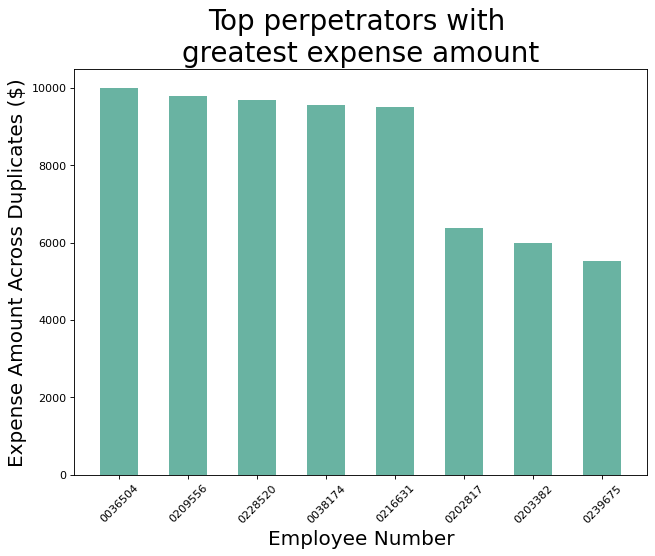

In [190]:
# Create figure

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(111)

# Multiple bar chart

ax.bar(x=duplicate_df_amount["employee_number"], height=duplicate_df_amount["total_expense"], width=0.55,align='center', color = '#69b3a2')

# Define x-ticks

plt.xticks(rotation=45)
# Layout and Display

plt.tight_layout()
plt.title("Top perpetrators with \ngreatest expense amount",  fontsize=25)

plt.xlabel("Employee Number",  fontsize=18)
plt.ylabel("Expense Amount Across Duplicates ($)",  fontsize=18)
plt.show()

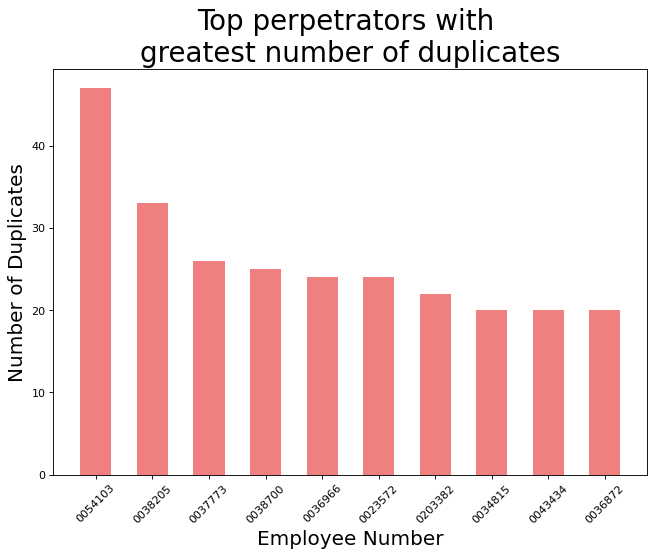

In [191]:
# Create figure

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(111)

# Multiple bar chart

ax.bar(x=duplicate_df_count["employee_number"], height=duplicate_df_count["count"], width=0.55,align='center', color = 'lightcoral')

# Define x-ticks

plt.xticks(rotation=45)
# Layout and Display

plt.tight_layout()
plt.title("Top perpetrators with \ngreatest number of duplicates",  fontsize=25)

plt.xlabel("Employee Number",  fontsize=18)
plt.ylabel("Number of Duplicates",  fontsize=18)
plt.show()

### Transaction Data: Check validity of transaction ID

In [47]:
transaction_copy = transaction.copy() # make a copy
numeric_id = transaction.copy() 
numeric_id = numeric_id[numeric_id["count"] == 1 ] # remove duplicates
transaction_copy = transaction_copy[transaction_copy["count"] == 1]
numeric_id['transaction_id'] = pd.to_numeric(numeric_id['transaction_id'], downcast = 'integer', errors = 'coerce') # Convert to integer, if error, convert to NA
invalid_id = transaction_copy[(numeric_id['transaction_id'].isna() == True) | (numeric_id['transaction_id'] == 0)] # Get invalid rows
invalid_id['transaction_id'].describe # Show invalid transaction ids

<bound method NDFrame.describe of 4                0
17       cs0001790
26              NA
31               0
53            SP47
           ...    
63803           NA
63807      inv2976
63808           Q1
63815           NA
63816     C9082757
Name: transaction_id, Length: 11342, dtype: object>

From the table above, there are many examples of invalid transaction IDs. Based on the assumption that transaction IDs must be numeric, these non-numeric values have been filtered out and flagged. Transaction IDs with 0 is also flagged as suspicious

In [101]:
countofinvalidtrans = invalid_id.copy()
countofinvalidtrans['expense_amount'] = (pd.to_numeric(transaction['expense_amount'], errors = "coerce").dropna())
countofinvalidtrans = countofinvalidtrans.groupby(['employee_number'], as_index=False).sum()
countofinvalidtrans = countofinvalidtrans.drop(columns = ["Column1", "count"])
countofinvalidtrans = countofinvalidtrans.sort_values(by='expense_amount', ascending=False)
countofinvalidtrans = countofinvalidtrans[:10]

In [103]:
employee_totaling = transaction.copy()

In [104]:
employee_totaling['expense_amount'] = (pd.to_numeric(transaction['expense_amount'], errors = "coerce").dropna())

In [105]:
employee_totaling = employee_totaling.groupby(['employee_number'], as_index=False).sum()
employee_totaling = employee_totaling.drop(columns = ["Column1", "count"])
employee_totaling

,employee_number,expense_amount
0,0020020,0.00
1,0020021,1175.84
2,0020023,15681.22
3,0020025,710.25
4,0020050,2367.63
...,...,...
1730,0241223,682.32
1731,0241685,406.65
1732,0241696,11305.57
1733,0241882,12631.13


In [106]:
fraud_vs_rest_df = countofinvalidtrans.merge(employee_totaling, left_on = 'employee_number', right_on = 'employee_number')

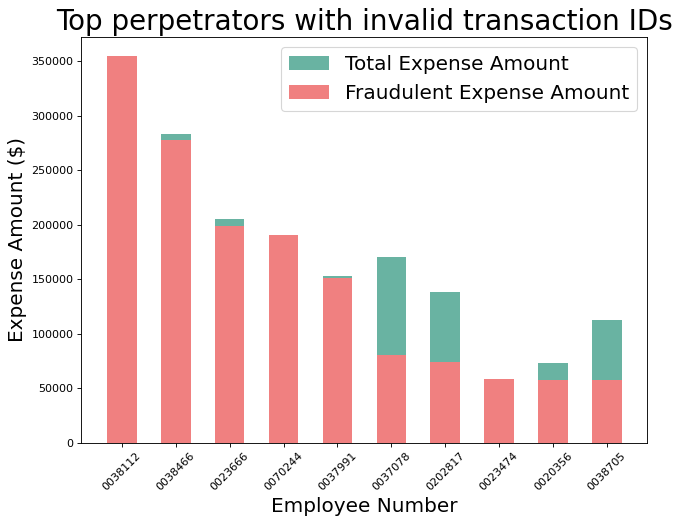

In [192]:
# Create figure

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(111)

# Multiple bar chart

ax.bar(x=fraud_vs_rest_df["employee_number"], height=fraud_vs_rest_df["expense_amount_y"], width=0.55,align='center', color = '#69b3a2')
ax.bar(x=fraud_vs_rest_df["employee_number"], height=fraud_vs_rest_df["expense_amount_x"], width=0.55,  align='center', color = 'lightcoral')

# Define x-ticks

plt.xticks(rotation=45)
# Layout and Display

plt.tight_layout()
plt.title("Top perpetrators with invalid transaction IDs",  fontsize=25)
plt.legend(['Total Expense Amount', 'Fraudulent Expense Amount'], fontsize=18 )

plt.xlabel("Employee Number",  fontsize=18)
plt.ylabel("Expense Amount ($)",  fontsize=18)
plt.show()

In [28]:
#added/edited
submitted = invalid_id[invalid_id['status'] != "UNSUBMITTED"] # filter out those not submitted i.e. not incurred
print("Amount lost: $", round(sum(pd.to_numeric(submitted["expense_amount"], downcast="float", errors = "coerce").dropna()),2)) 

Amount lost: $ 4715186.84


### Transaction Data: Check validity of employee ID

In [29]:
transaction_copy = transaction.copy() # make a copy
numeric_id = transaction.copy() 
numeric_id = numeric_id[numeric_id["count"] == 1] # remove duplicates
transaction_copy = transaction_copy[transaction_copy["count"] == 1]
numeric_id['employee_number'] = pd.to_numeric(numeric_id['employee_number'], downcast = 'integer', errors = 'coerce') # Convert to integer, if error, convert to NA
invalid_id = transaction_copy[(numeric_id['employee_number'].isna() == True) | (numeric_id['employee_number'] == 0)] # Get invalid rows
invalid_id # Show invalid transaction ids

,Column1,employee_number,vendor_name,custom_merchant_category,creditor_merchant_category,comment,expense_date,status,tax_code,expense_amount,net_amount,tax_amount,authorised_by,transaction_id,count,total_expense
3393,3394,020186A,DATAWORLD PTY LTD,Telephones and Fax Office,TELECOMMUNICATION EQUIPMENT IN,Work Bench for Tolling Custome,2021-08-28,SENT_TO_GL,P1,174.33,158.48,15.85,77780648,42536,1,174.33000
19033,19034,020186A,FINSBURY GREEN PRNTING,Stationery,"STATIONERY, OFFICE AND SCHOOL",RMS E-Toll Registry Welcome Le,2021-10-25,SENT_TO_GL,P1,571.5,519.55,51.95,77780648,SR144043,1,571.50000
58961,58962,020186A,FINSBURY GREEN PRNTING,Stationery,"STATIONERY, OFFICE AND SCHOOL",RMS E-Toll Application Form pr,2021-09-13,SENT_TO_GL,P1,1232.45,1120.41,112.04,77780648,SR139620,1,1232.45000


To check employee number validity, check if employee number is NA or if it is "0". Three entries are invalid

In [30]:
print("Amount lost: $", round(sum(pd.to_numeric(invalid_id["expense_amount"], downcast="float", errors = "coerce").dropna()),2)) 

Amount lost: $ 1978.28


### Transaction Data: Check if expense amount, net amount and tax amount is valid

In [31]:
invalid_transaction = transaction_clean.copy() # removed duplicates & unsubmitted
invalid_transaction['expense_amount'] = pd.to_numeric(invalid_transaction['expense_amount'], downcast = 'float', errors = 'coerce')
invalid_transaction['net_amount'] = pd.to_numeric(invalid_transaction['net_amount'], downcast = 'float', errors = 'coerce')
invalid_transaction['tax_amount'] = pd.to_numeric(invalid_transaction['tax_amount'], downcast = 'float', errors = 'coerce')

invalid_transaction = invalid_transaction[(invalid_transaction['expense_amount'] < 0) | 
                                          (invalid_transaction['net_amount'] < 0) | 
                                          (invalid_transaction['tax_amount'] < 0) | 
                                          (invalid_transaction['expense_amount'].isna() == True) | 
                                          (invalid_transaction['net_amount'].isna() == True) | 
                                          (invalid_transaction['tax_amount'].isna() == True)]
invalid_transaction

,Column1,employee_number,vendor_name,custom_merchant_category,creditor_merchant_category,comment,expense_date,status,tax_code,expense_amount,net_amount,tax_amount,authorised_by,transaction_id,count,total_expense
100,101,0022082,AMSA ONLINE PAYMENT,Unknown,"FIRE DEPTS, OTHER MISC GOVERNM",Refund,2021-12-13,SENT_TO_GL,P1,-194.000000,-176.360001,-17.639999,12356634,2323869712,1,-194.00000
150,151,0228171,REGIONAL EXPRESS BSP,Travel Domestic Airfares,AIRLINES (EXCLUDING THOSE WITH,Bob Higgins - GFN/SYD/GFN - ca,2021-08-15,SENT_TO_GL,P1,-886.049988,-805.500000,-80.550003,77778648,952159,1,-886.05000
402,403,0217262,BCF GRAFTON,Default Licensee Merchant Cat,SPORTING GOODS STORES,Lift jackets for Barge inspect,2021-08-17,SENT_TO_GL,P1,-537.000000,-488.179993,-48.820000,12374278,515550,1,-537.00000
434,435,0038112,AUST REGISTRY INV TR,Unknown,"FIRE DEPTS, OTHER MISC GOVERNM",Plan Lodgement,2021-11-26,SENT_TO_GL,P1,-3281.000000,-2982.729980,-298.269989,12362948,D482369D,1,-3281.00000
435,436,0037991,AUST REGISTRY INV TR,Unknown,"FIRE DEPTS, OTHER MISC GOVERNM",Plan Lodgement Fees from LRS,2021-11-26,SENT_TO_GL,P1,-3281.000000,-2982.729980,-298.269989,12359648,D482369D,1,-3281.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62911,62912,0056799,BUNNINGS 434000,Repairs & Maintenance Building,HARDWARE STORES,PPE purchase (boots) - return,2021-08-29,SENT_TO_GL,P1,-34.000000,-30.910000,-3.090000,12380262,24199,1,-34.00000
63071,63072,0239281,PAYMENT - CASH THANK YOU,Bank Fees,BANK FEES & CHARGES,Please pay amount to be reimbu,2021-11-13,SENT_TO_GL,P0,-64.000000,-64.000000,0.000000,12358658,NA,1,-64.00000
63382,63383,0038567,NTH SYDN COUNCIL PARKI,Parking,PARKING STATIONS AND GARAGES,Parking at Ennis Road - Majed,2021-10-10,SENT_TO_GL,P1,-6.140000,-5.580000,-0.560000,77777448,0,1,-6.14000
63510,63511,0037366,AMSA ONLINE PAYMENT,Unknown,"FIRE DEPTS, OTHER MISC GOVERNM",Refund for fee payment - Credi,2021-10-29,SENT_TO_GL,P1,-194.000000,-176.360001,-17.639999,77779323,2291142451,1,-194.00000


Check if values are negative. Negative values are very dangerous as it can hide the fraudulent amounts transacted by essentially subtracting the total amount transacted

Upon inspection, there is a need to check if transaction is a refund or reimbursement as they are legitimate

In [32]:
invalid_filtered = invalid_transaction[invalid_transaction['comment'].str.contains('Refund|refund|REFUND|Return|return|RETURN')==False]
invalid_filtered = invalid_filtered[invalid_filtered['comment'].str.contains('rufund|reimbu')==False] # misspelling
invalid_filtered

,Column1,employee_number,vendor_name,custom_merchant_category,creditor_merchant_category,comment,expense_date,status,tax_code,expense_amount,net_amount,tax_amount,authorised_by,transaction_id,count,total_expense
150,151,0228171,REGIONAL EXPRESS BSP,Travel Domestic Airfares,AIRLINES (EXCLUDING THOSE WITH,Bob Higgins - GFN/SYD/GFN - ca,2021-08-15,SENT_TO_GL,P1,-886.049988,-805.500000,-80.550003,77778648,952159,1,-886.05000
402,403,0217262,BCF GRAFTON,Default Licensee Merchant Cat,SPORTING GOODS STORES,Lift jackets for Barge inspect,2021-08-17,SENT_TO_GL,P1,-537.000000,-488.179993,-48.820000,12374278,515550,1,-537.00000
434,435,0038112,AUST REGISTRY INV TR,Unknown,"FIRE DEPTS, OTHER MISC GOVERNM",Plan Lodgement,2021-11-26,SENT_TO_GL,P1,-3281.000000,-2982.729980,-298.269989,12362948,D482369D,1,-3281.00000
435,436,0037991,AUST REGISTRY INV TR,Unknown,"FIRE DEPTS, OTHER MISC GOVERNM",Plan Lodgement Fees from LRS,2021-11-26,SENT_TO_GL,P1,-3281.000000,-2982.729980,-298.269989,12359648,D482369D,1,-3281.00000
472,473,0208303,COLLIER & MILLER,Repairs & Maintenance Building,"TIMBER, BUILDING MATERIALS STO",CREDIT ON TRAILER BRAKE PARTS,2021-08-23,SENT_TO_GL,P1,-243.279999,-221.160004,-22.120001,12346514,1264209,1,-243.28000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60719,60720,0036641,COLES 0703,"Staff Amenities (Coffee, Tea e","SUPERMARKETS, GROCERCY AND GEN",Diiference in cost when swappi,2021-12-04,SENT_TO_GL,P1,-9.400000,-8.550000,-0.850000,77777998,28694073,1,-9.40000
60735,60736,0038838,BUNNINGS 438000,Repairs & Maintenance Building,HARDWARE STORES,Tools for job,2021-07-24,SENT_TO_GL,P1,-129.960007,-118.150002,-11.810000,12370604,949176,1,-129.96000
61393,61394,0036145,246000 FCMTRAVELSOLUT,Travel Domestic Airfares,TRAVEL AGENCIES,Sivakumar/Siva,2021-07-24,SENT_TO_GL,P1,-108.199997,-98.360001,-9.840000,77779073,12423364,1,-108.20000
61557,61558,0052536,HARVEY NORMAN AV/IT,Minor Equipment Under 5k,DEPARTMENT STORES,office supplies - Shaun Walsh,2021-09-11,SENT_TO_GL,P1,-264.000000,-240.000000,-24.000000,NA,1684121,1,-264.00000


Refunds and returns have been filtered out. Transactions that have negative expense_amount can be considered suspicious. With illegitimate negative values, total expense is actually falsely decreased i.e. the company has incurred more expense than reflected

In [33]:
print("Amount lost: $", -1 * round(sum(pd.to_numeric(invalid_filtered["expense_amount"], downcast="float", errors = "coerce").dropna()),2)) 

Amount lost: $ 158065.98


### Transaction Data: Check if expense amount tallies with net amount and tax amount

In [34]:
invalid_transaction = transaction_clean.copy() # removed duplicates & unsubmitted
invalid_transaction['expense_amount'] = pd.to_numeric(invalid_transaction['expense_amount'], downcast = 'float', errors = 'coerce')
invalid_transaction['net_amount'] = pd.to_numeric(invalid_transaction['net_amount'], downcast = 'float', errors = 'coerce')
invalid_transaction['tax_amount'] = pd.to_numeric(invalid_transaction['tax_amount'], downcast = 'float', errors = 'coerce')
invalid_transaction['expense_amount_check'] = invalid_transaction['net_amount'] + invalid_transaction['tax_amount']

# Accuracy to the dollar
decimals = 0   
invalid_transaction['expense_amount'] = invalid_transaction['expense_amount'].apply(lambda x: round(x, decimals))
invalid_transaction['expense_amount_check'] = invalid_transaction['expense_amount_check'].apply(lambda x: round(x, decimals))

# Check if tally
invalid_transaction = invalid_transaction[invalid_transaction['expense_amount'] != invalid_transaction['expense_amount_check']]
invalid_transaction

,Column1,employee_number,vendor_name,custom_merchant_category,creditor_merchant_category,comment,expense_date,status,tax_code,expense_amount,net_amount,tax_amount,authorised_by,transaction_id,count,total_expense,expense_amount_check
57756,57757,0020020,NA,NA,NA,NA,None,NA,NA,NaN,NaN,NaN,NA,NA,1,0.00000,NaN


Valid tallying should follow this formula:

Expense amount = net amount + tax amount 

No findings after filtering out duplicate rows and unsubmitted transactions

### Transaction Data: Check valid tax code

In [35]:
submitted = transaction[transaction['status'] != "UNSUBMITTED"] # get submitted
isna = submitted[submitted['tax_code'].isna()]
isna

,Column1,employee_number,vendor_name,custom_merchant_category,creditor_merchant_category,comment,expense_date,status,tax_code,expense_amount,net_amount,tax_amount,authorised_by,transaction_id,count,total_expense


All transactions must have a tax code unless transaction has not been submitted. No findings

### Transaction Data: Check money flow to vendors

In [36]:
query = """
SELECT vendor_name, expense_amount FROM Transaction_Data_csv 
GROUP BY vendor_name
ORDER BY expense_amount DESC
"""

money_flow = read_query(cn, query)
money_flow

,vendor_name,expense_amount
0,NA,NA
1,AIR NEW ZEAL,999.76
2,WEAR PARTS SERVICES,999.6
3,EVERYTHING WELDING,997.75
4,Edwards Mower Repairs,997
...,...,...
11555,AMX SUPERSTORES,-129
11556,TOTALLY WORKWEAR GC,-125.73
11557,FINANCE CHARGE CREDIT,-1.84
11558,246000FCMTMS,-1.2


In [37]:
# remove NAs and convert expense_amount to numeric
money_flow.dropna() 
money_flow['expense_amount'] = pd.to_numeric(money_flow['expense_amount'], downcast = 'integer', errors = 'coerce')

No conclusion for this

### Transaction Data & Leave: Check if employees have made transactions during their leaves

In [39]:
query = """
SELECT Transaction_Data_csv.*, Leave_csv.from, Leave_csv.to
FROM Leave_csv 
INNER JOIN Transaction_Data_csv
ON Leave_csv.employee_number = Transaction_Data_csv.employee_number
"""

t_l = read_query(cn, query)
t_l

,Column1,employee_number,vendor_name,custom_merchant_category,creditor_merchant_category,comment,expense_date,status,tax_code,expense_amount,net_amount,tax_amount,authorised_by,transaction_id,count,total_expense,from,to
0,1,0037057,LUNA PARK SYDNEY PTY,Alert,QUICKPAYMENT SERVICE-FAST FOOD,Senior Leader Session AV - RMS,2021-08-07,SENT_TO_GL,P1,4195.25,3813.86,381.39,77779848,28196,1,4195.25000,2021-10-20,2021-10-20
1,3,0049488,ONE RICE ONE NOODLE,Alert,"EATING PLACES, RESTAURANTS",Dinner whilst working away fro,2021-09-13,SENT_TO_GL,P1,47.4,43.09,4.31,NA,4785,1,47.40000,2021-12-12,2021-12-12
2,3,0049488,ONE RICE ONE NOODLE,Alert,"EATING PLACES, RESTAURANTS",Dinner whilst working away fro,2021-09-13,SENT_TO_GL,P1,47.4,43.09,4.31,NA,4785,1,47.40000,2021-11-22,2021-11-22
3,3,0049488,ONE RICE ONE NOODLE,Alert,"EATING PLACES, RESTAURANTS",Dinner whilst working away fro,2021-09-13,SENT_TO_GL,P1,47.4,43.09,4.31,NA,4785,1,47.40000,2021-11-08,2021-11-08
4,3,0049488,ONE RICE ONE NOODLE,Alert,"EATING PLACES, RESTAURANTS",Dinner whilst working away fro,2021-09-13,SENT_TO_GL,P1,47.4,43.09,4.31,NA,4785,1,47.40000,2021-10-11,2021-10-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460379,63813,0061345,COLES 0995,"Staff Amenities (Coffee, Tea e","SUPERMARKETS, GROCERCY AND GEN",catering,2021-12-07,SENT_TO_GL,P1,46.15,41.95,4.2,NA,1991,1,46.15000,2021-08-14,2021-08-14
460380,63820,0038700,SERVICE NSW 4079,Unknown,"FIRE DEPTS, OTHER MISC GOVERNM",Registration plate replacement,2021-08-02,SENT_TO_GL,P1,46.2,42,4.2,NA,9006603,1,46.20000,2021-10-16,2021-10-16
460381,63820,0038700,SERVICE NSW 4079,Unknown,"FIRE DEPTS, OTHER MISC GOVERNM",Registration plate replacement,2021-08-02,SENT_TO_GL,P1,46.2,42,4.2,NA,9006603,1,46.20000,2021-09-18,2021-09-18
460382,63820,0038700,SERVICE NSW 4079,Unknown,"FIRE DEPTS, OTHER MISC GOVERNM",Registration plate replacement,2021-08-02,SENT_TO_GL,P1,46.2,42,4.2,NA,9006603,1,46.20000,2021-08-20,2021-08-20


In [40]:
# Convert to datetime format
transaction_leave = t_l.copy()
transaction_leave['to'] = pd.to_datetime(transaction_leave['to'], format = "%Y/%m/%d", errors = 'coerce').dropna()
transaction_leave['from'] = pd.to_datetime(transaction_leave['from'], format = "%Y/%m/%d", errors = 'coerce').dropna()
transaction_leave['expense_date'] = pd.to_datetime(transaction_leave['expense_date'], format = "%Y/%m/%d", errors = 'coerce').dropna()
transaction_leave.head()

,Column1,employee_number,vendor_name,custom_merchant_category,creditor_merchant_category,comment,expense_date,status,tax_code,expense_amount,net_amount,tax_amount,authorised_by,transaction_id,count,total_expense,from,to
0,1,0037057,LUNA PARK SYDNEY PTY,Alert,QUICKPAYMENT SERVICE-FAST FOOD,Senior Leader Session AV - RMS,2021-08-07,SENT_TO_GL,P1,4195.25,3813.86,381.39,77779848,28196,1,4195.25000,2021-10-20,2021-10-20
1,3,0049488,ONE RICE ONE NOODLE,Alert,"EATING PLACES, RESTAURANTS",Dinner whilst working away fro,2021-09-13,SENT_TO_GL,P1,47.4,43.09,4.31,NA,4785,1,47.40000,2021-12-12,2021-12-12
2,3,0049488,ONE RICE ONE NOODLE,Alert,"EATING PLACES, RESTAURANTS",Dinner whilst working away fro,2021-09-13,SENT_TO_GL,P1,47.4,43.09,4.31,NA,4785,1,47.40000,2021-11-22,2021-11-22
3,3,0049488,ONE RICE ONE NOODLE,Alert,"EATING PLACES, RESTAURANTS",Dinner whilst working away fro,2021-09-13,SENT_TO_GL,P1,47.4,43.09,4.31,NA,4785,1,47.40000,2021-11-08,2021-11-08
4,3,0049488,ONE RICE ONE NOODLE,Alert,"EATING PLACES, RESTAURANTS",Dinner whilst working away fro,2021-09-13,SENT_TO_GL,P1,47.4,43.09,4.31,NA,4785,1,47.40000,2021-10-11,2021-10-11


In [41]:
invalid_transaction_leave = transaction_leave.copy()
invalid_transaction_leave = invalid_transaction_leave[(invalid_transaction_leave['from'] < invalid_transaction_leave['expense_date']) & (invalid_transaction_leave['to'] > invalid_transaction_leave['expense_date'])]
invalid_transaction_leave[['employee_number', 'expense_date', 'from', 'to', 'expense_amount']]

,employee_number,expense_date,from,to,expense_amount
199324,0226757,2021-11-23,2021-11-19,2021-11-25,226.35
199415,0037076,2021-11-11,2021-11-10,2021-11-13,71.93
199515,0226757,2021-10-11,2021-10-10,2021-10-13,431
199603,0036627,2021-11-12,2021-11-08,2021-11-15,31.29
199659,0037140,2021-09-18,2021-09-17,2021-09-20,622
...,...,...,...,...,...
459967,0062977,2021-10-26,2021-10-22,2021-10-28,34.1
459971,0062977,2021-10-26,2021-10-22,2021-10-28,34.1
460025,0200869,2021-08-31,2021-08-20,2021-09-10,26.7
460055,0036872,2021-11-26,2021-11-24,2021-11-30,47.94


Employees should not be making transactions while they are on leave. This table contains employees who have done that which is indicative of potential fraudulent activity

In [42]:
submitted = invalid_transaction_leave[invalid_transaction_leave['status'] != "UNSUBMITTED"] # filter out those not submitted i.e. not incurred
print("Amount lost: $", round(sum(pd.to_numeric(submitted["expense_amount"], downcast="float", errors = "coerce").dropna()),2)) 

Amount lost: $ 530097.97


### Transaction Data: Check if vendor has multiple locations

In [43]:
sum(vendor.duplicated())

0

In [44]:


vendor_sus = vendor[vendor.duplicated(subset='vendor_name') == True]
vendor_sus

,Column1,vendor_name,vendor_location
42,43,COFFEE BEAN 33 PTY L,NEWCASTLE
52,53,SILVER SERVIC 133100,WOLLONGONG
77,78,QANTAS AIRW_ABN16009661901,DUBBO
89,90,AUSTRALIAN REFRIGERA,WAGGA WAGGA
100,101,K L & D L McGrath,GLEN INNES
...,...,...,...
14539,14540,AUTOBARN TAMWORTH,NEWCASTLE
14541,14542,FINSBURY GREEN PRNTING,BOWENFELS
14543,14544,MOUNT AUTOEQUIP SERV,DUBBO
14546,14547,DY-MARK AUST PTY LTD,NEWCASTLE
